In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-heart').getOrCreate()

#Sets the name of the app, and creates a SparkSession based on the options of this builder.

In [2]:
# CSV file has a header. infer Schema (type) of each column. If its false, all col are strings. 
df = spark.read.csv('heart.csv', header = True, inferSchema = True)

# Prints out the schema in the tree format.
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- ca: integer (nullable = true)
 |-- thal: integer (nullable = true)
 |-- target: integer (nullable = true)



In [3]:
df.show(df.count()) #Show all the dataframe entries. df.count() returns number of dataframe entries. 
#By default, show shows top 20 rows (like pandas head shows top 5)

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|

In [4]:
df.filter("age > 43").show() #Pyspark has easy filter function.

#For ex, to keep dataframe entries where age is not null, we can do:
#df = df.where("age is not null")

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|     1|
| 57|  1|  2|     150| 168|  0|      1|    174|    0|    1.6|    2|  0|   2|     1|
| 54|  1|  0|     140| 239|  0|      1|    160|    0|    1.2|    2|  0|   2|

In [5]:
df.groupBy('target').count().show() 

#Check the counts of the target variable
#165 in this data set has heart disease, and 138 does not.

+------+-----+
|target|count|
+------+-----+
|     1|  165|
|     0|  138|
+------+-----+



In [7]:
df.describe().show() #Table is too long to properly show

+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|               age|                sex|                cp|          trestbps|              chol|                fbs|          restecg|           thalach|              exang|           oldpeak|             slope|                ca|              thal|            target|
+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               303|                303|               303|               303|               303|                303|              303|               303|    

In [8]:
import pandas as pd
sample = df.toPandas()

In [12]:
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
df.describe().transpose().show()

AttributeError: 'DataFrame' object has no attribute 'transpose'

In [149]:
df.describe("age", "sex", "cp","trestbps","chol","fbs").show()

+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+
|summary|               age|                sex|                cp|          trestbps|              chol|                fbs|
+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+
|  count|               303|                303|               303|               303|               303|                303|
|   mean|54.366336633663366| 0.6831683168316832| 0.966996699669967|131.62376237623764|246.26402640264027| 0.1485148514851485|
| stddev|  9.08210098983786|0.46601082333962385|1.0320524894832983|  17.5381428135171| 51.83075098793005|0.35619787492797644|
|    min|                29|                  0|                 0|                94|               126|                  0|
|    max|                77|                  1|                 3|               200|               564|             

In [150]:
df.describe("restecg","thalach","exang","oldpeak","slope", "ca").show()

+-------+-----------------+------------------+-------------------+------------------+------------------+------------------+
|summary|          restecg|           thalach|              exang|           oldpeak|             slope|                ca|
+-------+-----------------+------------------+-------------------+------------------+------------------+------------------+
|  count|              303|               303|                303|               303|               303|               303|
|   mean|0.528052805280528|149.64686468646866|0.32673267326732675|1.0396039603960396|1.3993399339933994|0.7293729372937293|
| stddev|0.525859596359298| 22.90516111491409|0.46979446452231655|1.1610750220686346|0.6162261453459622|1.0226063649693276|
|    min|                0|                71|                  0|               0.0|                 0|                 0|
|    max|                2|               202|                  1|               6.2|                 2|                 4|
+-------

In [151]:
df.describe("thal").show()

+-------+------------------+
|summary|              thal|
+-------+------------------+
|  count|               303|
|   mean|2.3135313531353137|
| stddev|0.6122765072781408|
|    min|                 0|
|    max|                 3|
+-------+------------------+



In [152]:
#Want to see correlations. ml subpackage contains correlation function.
#It requires providing column of type Vector.
#VectorAssembler is a feature transformer that merges multiple columns into a vector column

from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

#convert column to vector column
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df.columns, outputCol=vector_col) #assemble a vector column with all df columns as input
df_vector = assembler.transform(df).select(vector_col)

matrix = Correlation.corr(df_vector, vector_col)

In [153]:
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
print(corrmatrix)

[[1.0, -0.09844660247479377, -0.0686530158401449, 0.27935090656128847, 0.2136779565595619, 0.12130764809337487, -0.1162108981585297, -0.39852193812106756, 0.09680082645526752, 0.21001256735867363, -0.16881423801209533, 0.27632624401913913, 0.06800137705465174, -0.22543871587483705], [-0.09844660247479377, 1.0, -0.04935287534698944, -0.05676882396964314, -0.19791217414110637, 0.04503178919356075, -0.05819626770375441, -0.044019907769574575, 0.1416638109915054, 0.09609287706773859, -0.030710567303172228, 0.11826141332035968, 0.2100410956372067, -0.2809365755017664], [-0.0686530158401449, -0.04935287534698944, 1.0, 0.04760776064464849, -0.07690439103320763, 0.09444403499533174, 0.04442059251016363, 0.29576212458791035, -0.39428026849502085, -0.1492301580970808, 0.11971658853470596, -0.1810530260534954, -0.16173557051002177, 0.43379826150689166], [0.27935090656128847, -0.05676882396964314, 0.04760776064464849, 1.0, 0.1231742065323906, 0.17753054193446025, -0.11410278639187006, -0.046697728

In [154]:
columns = df.columns
correlation = spark.createDataFrame(corrmatrix,columns)
correlation.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 age|                 sex|                  cp|            trestbps|                chol|                 fbs|             restecg|             thalach|               exang|             oldpeak|               slope|                  ca|                thal|              target|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 1.0|-0.09844660247479377| -0.0686530158401449| 0.27935090656128847|  0.2136779565595619| 0.121

In [155]:
import pandas as pd
correlation = correlation.toPandas() #convert pyspark dataframe to pandas for convient viewing

In [156]:
correlation

#we can see 4 and 5 (chol, fbs)have low correlation to target. remove them.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
1,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
2,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
3,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
4,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
5,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
6,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
7,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
8,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
9,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [157]:
df = df.select('age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target')
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- ca: integer (nullable = true)
 |-- thal: integer (nullable = true)
 |-- target: integer (nullable = true)



In [158]:
#combione all the features in one single feature vector

cols=df.columns
cols.remove("target")

# Let us import the vector assembler
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=cols,outputCol="features")
# Now let us use the transform method to transform our dataset

df=assembler.transform(df)
df.select("features").show(truncate=False)

+--------------------------------------------------+
|features                                          |
+--------------------------------------------------+
|[63.0,1.0,3.0,145.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0]|
|[37.0,1.0,2.0,130.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0]|
|[41.0,0.0,1.0,130.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0]|
|[56.0,1.0,1.0,120.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0]|
|[57.0,0.0,0.0,120.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0]|
|[57.0,1.0,0.0,140.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0]|
|[56.0,0.0,1.0,140.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0]|
|[44.0,1.0,1.0,120.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0]|
|[52.0,1.0,2.0,172.0,1.0,162.0,0.0,0.5,2.0,0.0,3.0]|
|[57.0,1.0,2.0,150.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0]|
|[54.0,1.0,0.0,140.0,1.0,160.0,0.0,1.2,2.0,0.0,2.0]|
|[48.0,0.0,2.0,130.0,1.0,139.0,0.0,0.2,2.0,0.0,2.0]|
|[49.0,1.0,1.0,130.0,1.0,171.0,0.0,0.6,2.0,0.0,2.0]|
|[64.0,1.0,3.0,110.0,0.0,144.0,1.0,1.8,1.0,0.0,2.0]|
|[58.0,0.0,3.0,150.0,0.0,162.0,0.0,1.0,2.0,0.0,2.0]|
|[50.0,0.0,2.0,120.0,1.0,158.0,0.0,1.6,1.0,0.0

In [159]:
df.show()

+---+---+---+--------+-------+-------+-----+-------+-----+---+----+------+--------------------+
|age|sex| cp|trestbps|restecg|thalach|exang|oldpeak|slope| ca|thal|target|            features|
+---+---+---+--------+-------+-------+-----+-------+-----+---+----+------+--------------------+
| 63|  1|  3|     145|      0|    150|    0|    2.3|    0|  0|   1|     1|[63.0,1.0,3.0,145...|
| 37|  1|  2|     130|      1|    187|    0|    3.5|    0|  0|   2|     1|[37.0,1.0,2.0,130...|
| 41|  0|  1|     130|      0|    172|    0|    1.4|    2|  0|   2|     1|[41.0,0.0,1.0,130...|
| 56|  1|  1|     120|      1|    178|    0|    0.8|    2|  0|   2|     1|[56.0,1.0,1.0,120...|
| 57|  0|  0|     120|      1|    163|    1|    0.6|    2|  0|   2|     1|[57.0,0.0,0.0,120...|
| 57|  1|  0|     140|      1|    148|    0|    0.4|    1|  0|   1|     1|[57.0,1.0,0.0,140...|
| 56|  0|  1|     140|      0|    153|    0|    1.3|    1|  0|   2|     1|[56.0,0.0,1.0,140...|
| 44|  1|  1|     120|      1|    173|  

In [160]:
from pyspark.ml.feature import StandardScaler
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
df=standardscaler.fit(df).transform(df)
df.select("features","Scaled_features").show(5)

+--------------------+--------------------+
|            features|     Scaled_features|
+--------------------+--------------------+
|[63.0,1.0,3.0,145...|[6.93672092729335...|
|[37.0,1.0,2.0,130...|[4.07394721126752...|
|[41.0,0.0,1.0,130...|[4.51437393680996...|
|[56.0,1.0,1.0,120...|[6.16597415759409...|
|[57.0,0.0,0.0,120...|[6.27608083897970...|
+--------------------+--------------------+
only showing top 5 rows



In [161]:
df.show()

+---+---+---+--------+-------+-------+-----+-------+-----+---+----+------+--------------------+--------------------+
|age|sex| cp|trestbps|restecg|thalach|exang|oldpeak|slope| ca|thal|target|            features|     Scaled_features|
+---+---+---+--------+-------+-------+-----+-------+-----+---+----+------+--------------------+--------------------+
| 63|  1|  3|     145|      0|    150|    0|    2.3|    0|  0|   1|     1|[63.0,1.0,3.0,145...|[6.93672092729335...|
| 37|  1|  2|     130|      1|    187|    0|    3.5|    0|  0|   2|     1|[37.0,1.0,2.0,130...|[4.07394721126752...|
| 41|  0|  1|     130|      0|    172|    0|    1.4|    2|  0|   2|     1|[41.0,0.0,1.0,130...|[4.51437393680996...|
| 56|  1|  1|     120|      1|    178|    0|    0.8|    2|  0|   2|     1|[56.0,1.0,1.0,120...|[6.16597415759409...|
| 57|  0|  0|     120|      1|    163|    1|    0.6|    2|  0|   2|     1|[57.0,0.0,0.0,120...|[6.27608083897970...|
| 57|  1|  0|     140|      1|    148|    0|    0.4|    1|  0|  

In [162]:
train, test = df.randomSplit([0.8, 0.2], seed=12345)

In [163]:
train.show()

+---+---+---+--------+-------+-------+-----+-------+-----+---+----+------+--------------------+--------------------+
|age|sex| cp|trestbps|restecg|thalach|exang|oldpeak|slope| ca|thal|target|            features|     Scaled_features|
+---+---+---+--------+-------+-------+-----+-------+-----+---+----+------+--------------------+--------------------+
| 29|  1|  1|     130|      0|    202|    0|    0.0|    2|  0|   2|     1|[29.0,1.0,1.0,130...|[3.19309376018265...|
| 34|  0|  1|     118|      1|    192|    0|    0.7|    2|  0|   2|     1|[34.0,0.0,1.0,118...|[3.74362716711070...|
| 34|  1|  3|     118|      0|    174|    0|    0.0|    2|  0|   2|     1|[34.0,1.0,3.0,118...|[3.74362716711070...|
| 35|  0|  0|     138|      1|    182|    0|    1.4|    2|  0|   2|     1|[35.0,0.0,0.0,138...|[3.85373384849630...|
| 35|  1|  0|     120|      1|    130|    1|    1.6|    1|  0|   3|     0|[35.0,1.0,0.0,120...|[3.85373384849630...|
| 35|  1|  0|     126|      0|    156|    1|    0.0|    2|  0|  

In [164]:
test.show()

+---+---+---+--------+-------+-------+-----+-------+-----+---+----+------+--------------------+--------------------+
|age|sex| cp|trestbps|restecg|thalach|exang|oldpeak|slope| ca|thal|target|            features|     Scaled_features|
+---+---+---+--------+-------+-------+-----+-------+-----+---+----+------+--------------------+--------------------+
| 35|  1|  1|     122|      1|    174|    0|    0.0|    2|  0|   2|     1|[35.0,1.0,1.0,122...|[3.85373384849630...|
| 41|  1|  1|     110|      1|    153|    0|    0.0|    2|  0|   2|     1|[41.0,1.0,1.0,110...|[4.51437393680996...|
| 41|  1|  1|     120|      1|    182|    0|    0.0|    2|  0|   2|     1|[41.0,1.0,1.0,120...|[4.51437393680996...|
| 42|  0|  0|     102|      0|    122|    0|    0.6|    1|  0|   2|     1|(11,[0,3,5,7,8,10...|(11,[0,3,5,7,8,10...|
| 42|  1|  3|     148|      0|    178|    0|    0.8|    2|  2|   2|     1|[42.0,1.0,3.0,148...|[4.62448061819557...|
| 44|  1|  0|     110|      0|    177|    0|    0.0|    2|  1|  

In [165]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol="target", featuresCol="Scaled_features",maxIter=10)
model=lr.fit(train) #train the model with training data

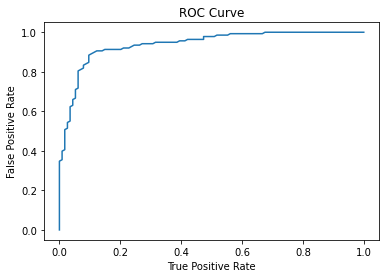

Training set areaUnderROC: 0.9392639206712433


In [166]:
import matplotlib.pyplot as plt

trainingSummary = model.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

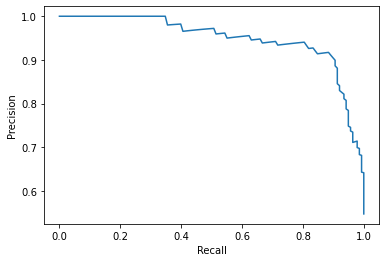

In [167]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [168]:
predict_train = model.transform(train)
predict_test = model.transform(test)
predict_test.select("target","prediction").show(10)

+------+----------+
|target|prediction|
+------+----------+
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     0|       1.0|
|     1|       1.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 10 rows



In [169]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator=BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol="target")
predict_test.select("target","rawPrediction","prediction","probability").show(5)
print("The area under ROC for train set is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set is {}".format(evaluator.evaluate(predict_test)))

+------+--------------------+----------+--------------------+
|target|       rawPrediction|prediction|         probability|
+------+--------------------+----------+--------------------+
|     1|[-2.6951956465157...|       1.0|[0.06325744590332...|
|     1|[-2.1297870465024...|       1.0|[0.10623520976312...|
|     1|[-3.0056559757481...|       1.0|[0.04717100815547...|
|     1|[-1.3080983125796...|       1.0|[0.21280523923069...|
|     1|[-2.0136997983929...|       1.0|[0.11777201824994...|
+------+--------------------+----------+--------------------+
only showing top 5 rows

The area under ROC for train set is 0.9396135265700487
The area under ROC for test set is 0.8070987654320987


In [170]:
new = predict_test.toPandas()

In [171]:
new

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target,features,Scaled_features,rawPrediction,probability,prediction
0,35,1,1,122,1,174,0,0.0,2,0,2,1,"[35.0, 1.0, 1.0, 122.0, 1.0, 174.0, 0.0, 0.0, ...","[3.8537338484963097, 2.1458729066282016, 0.968...","[-2.6951956465157902, 2.6951956465157902]","[0.06325744590332193, 0.9367425540966781]",1.0
1,41,1,1,110,1,153,0,0.0,2,0,2,1,"[41.0, 1.0, 1.0, 110.0, 1.0, 153.0, 0.0, 0.0, ...","[4.514373936809963, 2.1458729066282016, 0.9689...","[-2.1297870465024786, 2.1297870465024786]","[0.10623520976312613, 0.8937647902368739]",1.0
2,41,1,1,120,1,182,0,0.0,2,0,2,1,"[41.0, 1.0, 1.0, 120.0, 1.0, 182.0, 0.0, 0.0, ...","[4.514373936809963, 2.1458729066282016, 0.9689...","[-3.005655975748171, 3.005655975748171]","[0.047171008155477326, 0.9528289918445226]",1.0
3,42,0,0,102,0,122,0,0.6,1,0,2,1,"(42.0, 0.0, 0.0, 102.0, 0.0, 122.0, 0.0, 0.6, ...","(4.624480618195571, 0.0, 0.0, 5.81589516544397...","[-1.3080983125796815, 1.3080983125796815]","[0.21280523923069672, 0.7871947607693033]",1.0
4,42,1,3,148,0,178,0,0.8,2,2,2,1,"[42.0, 1.0, 3.0, 148.0, 0.0, 178.0, 0.0, 0.8, ...","[4.624480618195571, 2.1458729066282016, 2.9068...","[-2.013699798392939, 2.013699798392939]","[0.11777201824994567, 0.8822279817500543]",1.0
5,44,1,0,110,0,177,0,0.0,2,1,2,0,"[44.0, 1.0, 0.0, 110.0, 0.0, 177.0, 0.0, 0.0, ...","[4.844693980966789, 2.1458729066282016, 0.0, 6...","[-1.1755572577191025, 1.1755572577191025]","[0.2358519531960281, 0.7641480468039719]",1.0
6,44,1,1,120,1,170,0,0.0,2,0,2,1,"[44.0, 1.0, 1.0, 120.0, 1.0, 170.0, 0.0, 0.0, ...","[4.844693980966789, 2.1458729066282016, 0.9689...","[-2.5519556162553494, 2.5519556162553494]","[0.072295215127837, 0.9277047848721629]",1.0
7,46,1,0,120,0,144,0,0.8,2,0,3,0,"[46.0, 1.0, 0.0, 120.0, 0.0, 144.0, 0.0, 0.8, ...","[5.064907343738007, 2.1458729066282016, 0.0, 6...","[0.7713938845488184, -0.7713938845488184]","[0.6838223417942922, 0.3161776582057077]",0.0
8,50,1,0,150,0,128,0,2.6,1,0,3,0,"[50.0, 1.0, 0.0, 150.0, 0.0, 128.0, 0.0, 2.6, ...","[5.505334069280442, 2.1458729066282016, 0.0, 8...","[3.5365485746656633, -3.5365485746656633]","[0.9717099877380776, 0.028290012261922407]",0.0
9,51,0,0,130,1,142,1,1.2,1,0,3,0,"[51.0, 0.0, 0.0, 130.0, 1.0, 142.0, 1.0, 1.2, ...","[5.6154407506660515, 0.0, 0.0, 7.4124154069383...","[0.14552521809569482, -0.14552521809569482]","[0.5363172345121591, 0.46368276548784093]",0.0
